In [1]:
import sys, platform, os
import numpy as np
from scipy.stats import chisquare

camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Obteniendo los valores de los parámetros

In [ ]:
ombh2s = np.linspace(0.005, 0.105, 5)
omch2s = np.linspace(0.050, 0.150, 5)

#fig = plt.figure()
for ombh2 in ombh2s:
    ombh2 = ombh2
    #print(ombh2)
    #fig, ax = plt.subplots(1,1, figsize=(8,6), squeeze=False)
    for omch2 in omch2s:
        omch2 = omch2
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=0.06)
        pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
        pars.set_for_lmax(5050, lens_potential_accuracy=0);
        #calculate results for these parameters
        results = camb.get_results(pars)
        #print(omch2)
        powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
        totCL=powers['total']
        unlensedCL=powers['unlensed_scalar']
        ls = np.arange(totCL.shape[0])
        #print(ls)
        #ax[0,0].plot(ls, unlensedCL[:,0], label='$\\Omega_b h^2$ = {ombh2}, $\\Omega_c h^2 $ = {omch2}'.format(ombh2=ombh2,omch2=omch2))
        #plt.legend(loc='best')
        #plt.xscale('log')
        #plt.xlabel('$\ell$')
        #plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
        ell  = np.array(ls)
        D_ell = np.array(unlensedCL[:,0])
        #ab = np.zeros(ell.size, dtype=[('var1', int), ('var2', float)])
        #ab['var1'] = ell
        #ab['var2'] = D_ell
        #np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv",  np.r_[ell, D_ell], delimiter=',', header='ell,D_ell')
        np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv",  list(zip(ls,D_ell)), fmt='%.7g', delimiter=',', header='ell,D_ell')
        ##np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv", ls, delimiter=',', fmt=['%d' , '%f'], header='ell,D_ell', comments='')
        #np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv", (ls, unlensedCL[:,0]), delimiter=',')   # X is an array
    #for ax in ax.reshape(-1): ax.set_xlim([2,5050]);
    #plt.show()
    #plt.savefig("Graph" + str(ombh2) + "," + str(omch2) +".png", format="PNG")

In [ ]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.005,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.005,0.075.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.005,0.1.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.005,0.15.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.005\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.005\n$\\Omega_c h^2$=0.075")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.005\n$\\Omega_c h^2$=0.1")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.005\n$\\Omega_c h^2$=0.15")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")


#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,005', dpi=100)

In [ ]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.03,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.03,0.075.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.03,0.1.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.03,0.15.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.03\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.03\n$\\Omega_c h^2$=0.075")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.03\n$\\Omega_c h^2$=0.1")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.03\n$\\Omega_c h^2$=0.15")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")

for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,03', dpi=100)

In [ ]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.05499999999999999,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.05499999999999999,0.075.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.05499999999999999,0.1.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.05499999999999999,0.15.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.055\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.055\n$\\Omega_c h^2$=0.075")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.055\n$\\Omega_c h^2$=0.1")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.055\n$\\Omega_c h^2$=0.15")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")


#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,05499999999999999', dpi=100)

In [ ]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.08,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.08,0.075.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.08,0.1.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.08,0.15.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(8, 8)
#plt.xscale('log')
#plt.xlabel('$\ell$')
#plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.08\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.08\n$\\Omega_c h^2$=0.075")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.08\n$\\Omega_c h^2$=0.1")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.08\n$\\Omega_c h^2$=0.15")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")


for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,08', dpi=100)

In [ ]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.105,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.105,0.075.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.105,0.1.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.105,0.15.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.075")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.1")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.15")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")


for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,105', dpi=100)

In [3]:
ombh2s = np.linspace(0.05, 0.105, 6)
omch2s = np.linspace(0.05, 0.105, 6)

#fig = plt.figure()
for ombh2 in ombh2s:
    ombh2 = ombh2
    #print(ombh2)
    #fig, ax = plt.subplots(1,1, figsize=(8,6), squeeze=False)
    for omch2 in omch2s:
        omch2 = omch2
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=0.06)
        pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
        pars.set_for_lmax(5050, lens_potential_accuracy=0);
        #calculate results for these parameters
        results = camb.get_results(pars)
        #print(omch2)
        powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
        totCL=powers['total']
        unlensedCL=powers['unlensed_scalar']
        ls = np.arange(totCL.shape[0])
        #print(ls)
        #ax[0,0].plot(ls, unlensedCL[:,0], label='$\\Omega_b h^2$ = {ombh2}, $\\Omega_c h^2 $ = {omch2}'.format(ombh2=ombh2,omch2=omch2))
        #plt.legend(loc='best')
        #plt.xscale('log')
        #plt.xlabel('$\ell$')
        #plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
        ell  = np.array(ls)
        D_ell = np.array(unlensedCL[:,0])
        np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv",  list(zip(ls,D_ell)), fmt='%.7g', delimiter=',', header='ell,D_ell')
        
    #for ax in ax.reshape(-1): ax.set_xlim([2,5050]);
    #plt.show()
    #plt.savefig("Graph" + str(ombh2) + "," + str(omch2) +".png", format="PNG")

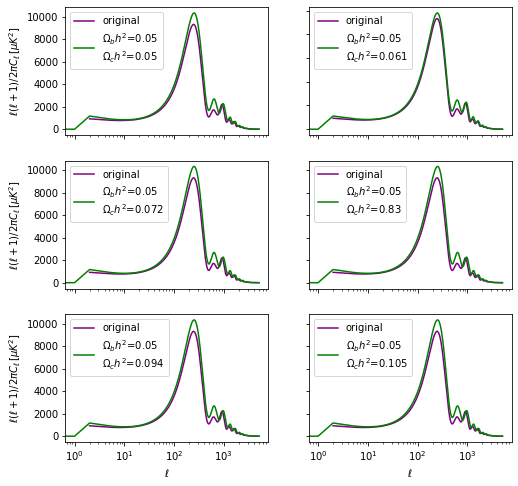

In [13]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.05,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.05,0.061.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.05,0.07200000000000001.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.05,0.083.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.05,0.094.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.05,0.105.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.05\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.05\n$\\Omega_c h^2$=0.061")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.05\n$\\Omega_c h^2$=0.072")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.05\n$\\Omega_c h^2$=0.83")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")

axs[2, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.05\n$\\Omega_c h^2$=0.094")
#axs[2, 0].set_title('Axis [0, 0]')
axs[2, 0].set_xlabel('$\ell$')
axs[2, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 0].legend(loc="upper left")

axs[2, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.05\n$\\Omega_c h^2$=0.105")
#axs[2, 1].set_title('Axis [0, 0]')
axs[2, 1].set_xlabel('$\ell$')
axs[2, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 1].legend(loc="upper left")



for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,05-2', dpi=100)

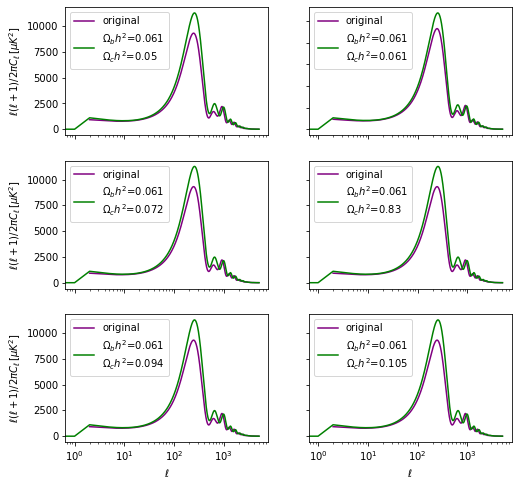

In [14]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.061,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.061,0.061.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.061,0.07200000000000001.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.061,0.083.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.061,0.094.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.061,0.105.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.061\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.061\n$\\Omega_c h^2$=0.061")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.061\n$\\Omega_c h^2$=0.072")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.061\n$\\Omega_c h^2$=0.83")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")

axs[2, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.061\n$\\Omega_c h^2$=0.094")
#axs[2, 0].set_title('Axis [0, 0]')
axs[2, 0].set_xlabel('$\ell$')
axs[2, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 0].legend(loc="upper left")

axs[2, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.061\n$\\Omega_c h^2$=0.105")
#axs[2, 1].set_title('Axis [0, 0]')
axs[2, 1].set_xlabel('$\ell$')
axs[2, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 1].legend(loc="upper left")



for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,061-2', dpi=100)

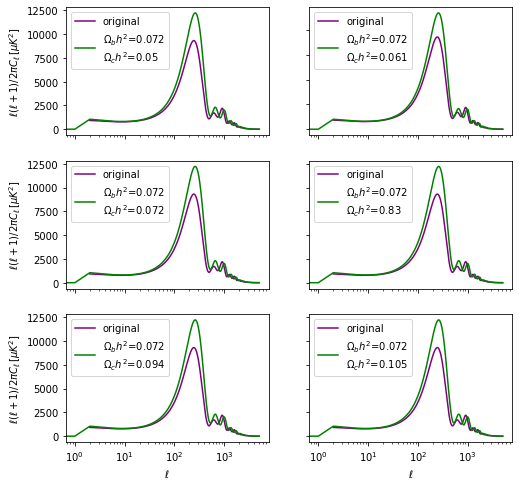

In [15]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.07200000000000001,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.07200000000000001,0.061.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.07200000000000001,0.07200000000000001.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.07200000000000001,0.083.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.07200000000000001,0.094.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.07200000000000001,0.105.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.072\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.072\n$\\Omega_c h^2$=0.061")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.072\n$\\Omega_c h^2$=0.072")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.072\n$\\Omega_c h^2$=0.83")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")

axs[2, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.072\n$\\Omega_c h^2$=0.094")
#axs[2, 0].set_title('Axis [0, 0]')
axs[2, 0].set_xlabel('$\ell$')
axs[2, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 0].legend(loc="upper left")

axs[2, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.072\n$\\Omega_c h^2$=0.105")
#axs[2, 1].set_title('Axis [0, 0]')
axs[2, 1].set_xlabel('$\ell$')
axs[2, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 1].legend(loc="upper left")



for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,072-2', dpi=100)

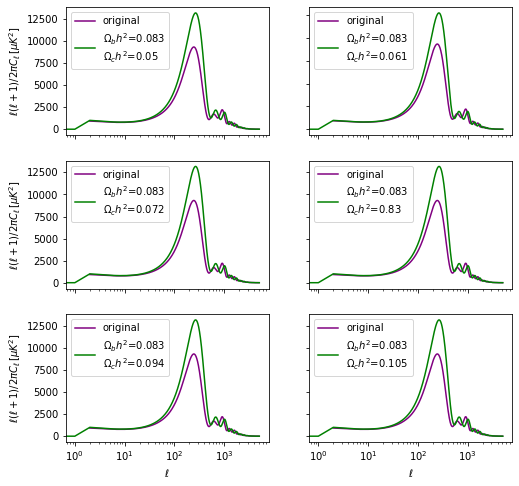

In [16]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.083,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.083,0.061.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.083,0.07200000000000001.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.083,0.083.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.083,0.094.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.083,0.105.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.083\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.083\n$\\Omega_c h^2$=0.061")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.083\n$\\Omega_c h^2$=0.072")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.083\n$\\Omega_c h^2$=0.83")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")

axs[2, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.083\n$\\Omega_c h^2$=0.094")
#axs[2, 0].set_title('Axis [0, 0]')
axs[2, 0].set_xlabel('$\ell$')
axs[2, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 0].legend(loc="upper left")

axs[2, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.083\n$\\Omega_c h^2$=0.105")
#axs[2, 1].set_title('Axis [0, 0]')
axs[2, 1].set_xlabel('$\ell$')
axs[2, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 1].legend(loc="upper left")



for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,083-2', dpi=100)

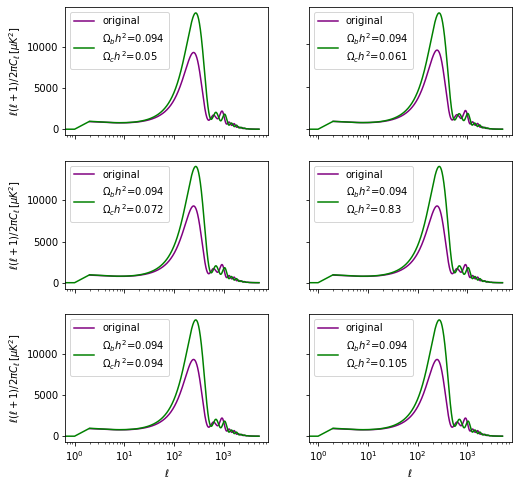

In [18]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.094,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.094,0.061.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.094,0.07200000000000001.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.094,0.083.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.094,0.094.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.094,0.105.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.094\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.094\n$\\Omega_c h^2$=0.061")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.094\n$\\Omega_c h^2$=0.072")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.094\n$\\Omega_c h^2$=0.83")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")

axs[2, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.094\n$\\Omega_c h^2$=0.094")
#axs[2, 0].set_title('Axis [0, 0]')
axs[2, 0].set_xlabel('$\ell$')
axs[2, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 0].legend(loc="upper left")

axs[2, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.094\n$\\Omega_c h^2$=0.105")
#axs[2, 1].set_title('Axis [0, 0]')
axs[2, 1].set_xlabel('$\ell$')
axs[2, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 1].legend(loc="upper left")



for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,094-2', dpi=100)

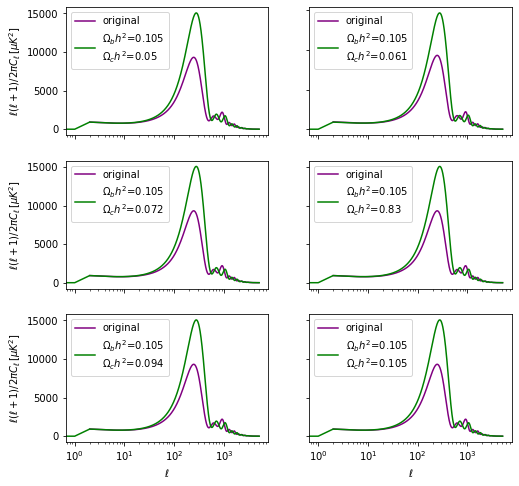

In [19]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.105,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.105,0.061.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.105,0.07200000000000001.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.105,0.083.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.105,0.094.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.105,0.105.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.061")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.072")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.83")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")

axs[2, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.094")
#axs[2, 0].set_title('Axis [0, 0]')
axs[2, 0].set_xlabel('$\ell$')
axs[2, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 0].legend(loc="upper left")

axs[2, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.105")
#axs[2, 1].set_title('Axis [0, 0]')
axs[2, 1].set_xlabel('$\ell$')
axs[2, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 1].legend(loc="upper left")



for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,105-2', dpi=100)

In [20]:
ombh2s = np.linspace(0.05, 0.072, 6)
omch2s = np.linspace(0.05, 0.072, 6)

#fig = plt.figure()
for ombh2 in ombh2s:
    ombh2 = ombh2
    #print(ombh2)
    #fig, ax = plt.subplots(1,1, figsize=(8,6), squeeze=False)
    for omch2 in omch2s:
        omch2 = omch2
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=0.06)
        pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
        pars.set_for_lmax(5050, lens_potential_accuracy=0);
        #calculate results for these parameters
        results = camb.get_results(pars)
        #print(omch2)
        powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
        totCL=powers['total']
        unlensedCL=powers['unlensed_scalar']
        ls = np.arange(totCL.shape[0])
        #print(ls)
        #ax[0,0].plot(ls, unlensedCL[:,0], label='$\\Omega_b h^2$ = {ombh2}, $\\Omega_c h^2 $ = {omch2}'.format(ombh2=ombh2,omch2=omch2))
        #plt.legend(loc='best')
        #plt.xscale('log')
        #plt.xlabel('$\ell$')
        #plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
        ell  = np.array(ls)
        D_ell = np.array(unlensedCL[:,0])
        np.savetxt("test" + str(ombh2) + "," + str(omch2) + ".csv",  list(zip(ls,D_ell)), fmt='%.7g', delimiter=',', header='ell,D_ell')
        
    #for ax in ax.reshape(-1): ax.set_xlim([2,5050]);
    #plt.show()
    #plt.savefig("Graph" + str(ombh2) + "," + str(omch2) +".png", format="PNG")

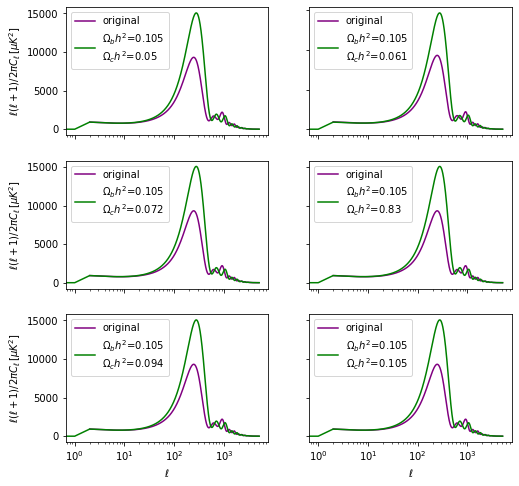

In [19]:
data = np.genfromtxt("D_ell.csv", delimiter=",", names=["x", "y"])
data1 = np.genfromtxt("test0.05,0.05.csv", delimiter=",", names=["x", "y"])
data2 = np.genfromtxt("test0.05,0.054400000000000004.csv", delimiter=",", names=["x", "y"])
data3 = np.genfromtxt("test0.05,0.0588.csv", delimiter=",", names=["x", "y"])
data4 = np.genfromtxt("test0.05,0.0632.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.05,0.0676.csv", delimiter=",", names=["x", "y"])
data5 = np.genfromtxt("test0.05,0.105.csv", delimiter=",", names=["x", "y"])

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(8, 8)
plt.xscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')

axs[0, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.05")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_xlabel('$\ell$')
axs[0, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 0].legend(loc="upper left")

axs[0, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[0, 1].semilogx(data2['x'], data2['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.061")
#axs[0, 1].set_title('Axis [0, 0]')
axs[0, 1].set_xlabel('$\ell$')
axs[0, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[0, 1].legend(loc="upper left")

axs[1, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.072")
#axs[1, 0].set_title('Axis [0, 0]')
axs[1, 0].set_xlabel('$\ell$')
axs[1, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 0].legend(loc="upper left")

axs[1, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[1, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.83")
#axs[1, 1].set_title('Axis [0, 0]')
axs[1, 1].set_xlabel('$\ell$')
axs[1, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[1, 1].legend(loc="upper left")

axs[2, 0].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 0].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.094")
#axs[2, 0].set_title('Axis [0, 0]')
axs[2, 0].set_xlabel('$\ell$')
axs[2, 0].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 0].legend(loc="upper left")

axs[2, 1].semilogx(data['x'], data['y'],color="purple", label="original")
axs[2, 1].semilogx(data1['x'], data1['y'],color="green", label="$\\Omega_b h^2$=0.105\n$\\Omega_c h^2$=0.105")
#axs[2, 1].set_title('Axis [0, 0]')
axs[2, 1].set_xlabel('$\ell$')
axs[2, 1].set_ylabel('$\ell(\ell+1)/2\pi C_\ell\,[\mu K^2]$')
axs[2, 1].legend(loc="upper left")



for ax in axs.flat:
    ax.label_outer()

plt.savefig('ombh2=0,105-2', dpi=100)